## <span style="color:lightblue"> DATA SCIENCE AND MACHINE LEARNING INTERNSHIP PROGRAM </span>

## Mini Project 1 - Stock Market Analysis Using Python

### <span style="color:aqua"> Business Scenario: </span>
Data Science extracts meaningful insights from chunks of raw data, which is useful to different business segments for planning their future course of action. Finance is many aspects of our lives. Here, we will analyze data from the stock market for some technology stocks such as Apple, Google, Amazon, and Microsoft.

<span style="color:aqua">Objective:</span> Use Python libraries such Pandas, Seaborn, and Matplotlib to extract and analyze the information, visualize it, and look at different ways to analyze the rist of a stock, based on its performance history.

<span style="color:aqua">About the Data:</span> The stocks we have chosen are from various industries and market caps namely
* Apple
* Google
* Mircosoft
* Amazon
For the start, I will investigate the amazon stock individually and then move on to the combined analysis.
To know more about stocks and their data please visit the below link: https://in.finance.yahoo.com/

The following tasks are to be performed:
* Read the Data from yahoo finance website directly
* perform cleaning
* what ws the change in stock price over time?
* Visualize the change in a stock's volume being traded, over time?
* What was the moving average of various stocks?
* What was the daily return average of a stock?
* Add anew column 'Trend' whose values are based on the 'Daily Return'.
* Visualize trend frequency through a Pie Chart.
* What was the correlation between the daily returns of different stocks?

In [1]:
#Importing libraries and modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from yahoo_fin.stock_info import get_data

In [2]:
today = datetime.date.today()
last_year = today - datetime.timedelta(days=365)
last_year, today

(datetime.date(2023, 1, 2), datetime.date(2024, 1, 2))

In [3]:
tickers = ["AAPL", "AMZN", "GOOG", "MSFT"]
ticker_data = {}
for ticker in tickers:
    data = get_data(ticker, start_date=last_year, end_date=today, interval="1d", index_as_date=True)
    # print(f'gotten data for {ticker}')
    ticker_data[ticker] = data
    # print(f'stored data for {ticker}')

gotten data for AAPL
stored data for AAPL
gotten data for AMZN
stored data for AMZN
gotten data for GOOG
stored data for GOOG
gotten data for MSFT
stored data for MSFT


In [4]:
ticker_data["AAPL"].head()

,open,high,low,close,adjclose,volume,ticker
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.374802,112117500,AAPL
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.657639,89113600,AAPL
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.325073,80962700,AAPL
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.899506,87754700,AAPL
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.426575,70790800,AAPL


since the data comes with the ticker label let me try combining it all together

In [5]:
combined_df= pd.concat(ticker_data)

Ok the combining the stock history data was possible and would probably be used for the combined analysis for now I will just analyse the Amazon stock

In [6]:
#selecting the amazon data from the stock prediction data
amzn_df = ticker_data['AMZN']
amzn_df.head()
#I can drop the ticker column since it is not necessary here
amzn_df.drop('ticker', axis=1, inplace=True)
amzn_df.index = pd.to_datetime(amzn_df.index)

In [7]:
amzn_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      250 non-null    float64
 1   high      250 non-null    float64
 2   low       250 non-null    float64
 3   close     250 non-null    float64
 4   adjclose  250 non-null    float64
 5   volume    250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [31]:
amzn_df.describe()['close']

min     83.120003
max    154.070007
Name: close, dtype: float64

In [9]:
amzn_df.duplicated().sum()

0

Ok so the data have no duplicated entries neither does it have any null entries
What other things should I can  check for (Eben make sure to consider when going through this again)
I would love a feedback from the assignment but (Edureka finds the best way possible to allow her students just keep wandering🥹😁🙂)

In [10]:
amzn_df.head()

,open,high,low,close,adjclose,volume
2023-01-03,85.459999,86.959999,84.209999,85.820000,85.820000,76706000
2023-01-04,86.550003,86.980003,83.360001,85.139999,85.139999,68885100
2023-01-05,85.330002,85.419998,83.070000,83.120003,83.120003,67930800
2023-01-06,83.029999,86.400002,81.430000,86.080002,86.080002,83303400
2023-01-09,87.459999,89.480003,87.080002,87.360001,87.360001,65266100


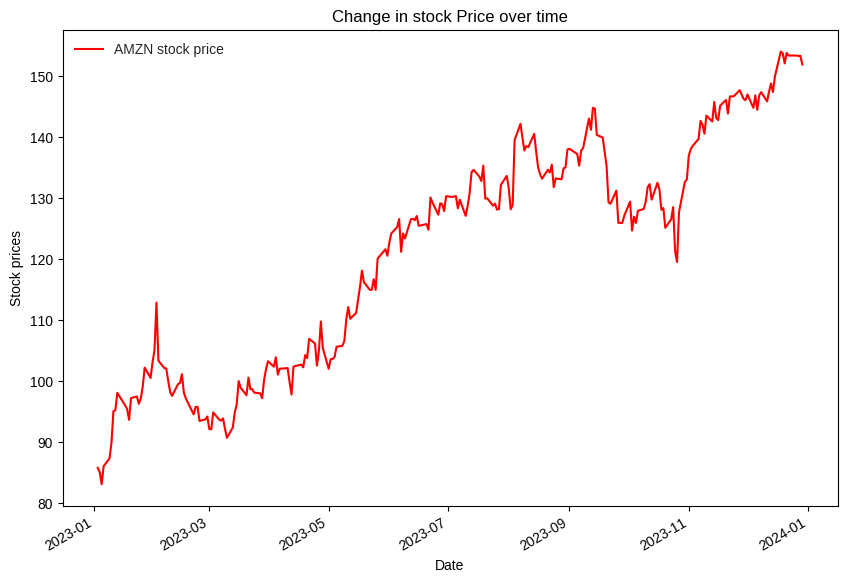

In [11]:
# The change in stock price over time
fig, ax = plt.subplots(figsize=(10, 7))
amzn_df['close'].plot(label='AMZN stock price', color='red', ax=ax)
plt.style.use('seaborn-v0_8-whitegrid')
plt.legend()
plt.ylabel("Stock prices")
plt.xlabel("Date")
plt.title("Change in stock Price over time");

From this chart the price of amazon stock obviously increased with time

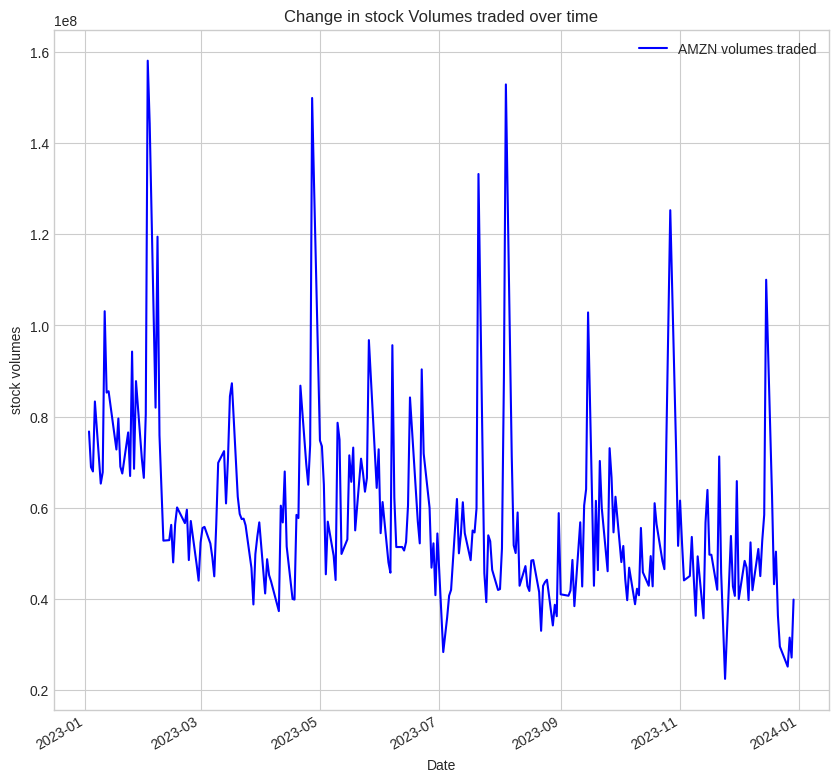

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
amzn_df['volume'].plot(label='AMZN volumes traded', color='blue', ax=ax)
plt.style.use('seaborn-v0_8-whitegrid')
plt.legend()
plt.ylabel("stock volumes")
plt.xlabel("Date")
plt.title("Change in stock Volumes traded over time");

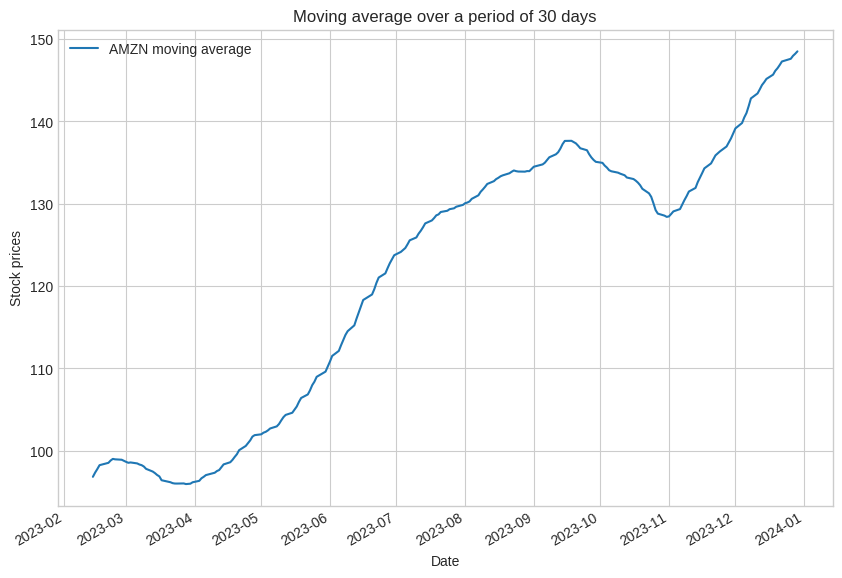

In [13]:
#the moving average of the amazon stock
window_size = 30
fig, ax = plt.subplots(figsize=(10, 7))
amzn_df['adjclose'].rolling(window=window_size).mean().plot(label='AMZN moving average', ax=ax)
plt.style.use('seaborn-v0_8-whitegrid')
plt.legend()
plt.ylabel("Stock prices")
plt.xlabel("Date")
plt.title("Moving average over a period of 30 days");

In [14]:
amzn_df['Daily Return'] = amzn_df['adjclose'].pct_change().fillna(0)
daily_return_average = amzn_df['Daily Return'].mean()
print(f'On an average the amazon stock is increases by {round(daily_return_average * 100, 2)}% daily')

On an average the amazon stock is increases by 0.25% daily


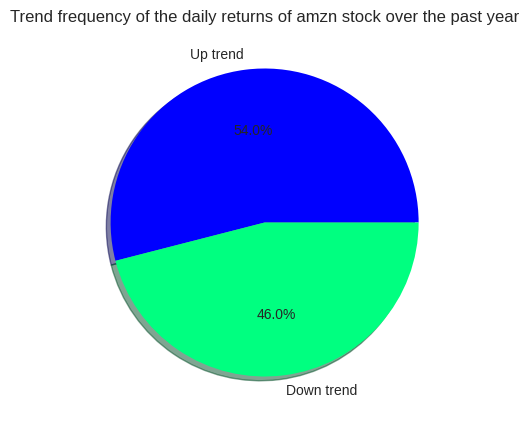

In [15]:
amzn_df['Trend'] = np.where(amzn_df['Daily Return'] > 0, 'Up', 'Down')
fig, ax = plt.subplots(figsize=(5, 5))
trend_count = amzn_df['Trend'].value_counts()
trend_count.plot(kind='pie', labels=["Up trend", "Down trend"], autopct='%1.1f%%',
                 shadow=True,
                 startangle=360,
                 cmap='winter',
                 ax=ax)
plt.ylabel('');
plt.title("Trend frequency of the daily returns of amzn stock over the past year");

#### Over the past year Amazon's stock has experienced a 54% upward trend, which is fairly typical .The combined analysis will help me determine which stock exhibits more stability in its upward trajectory

Now I can't get the correlation between daily returns of different stocks because this analysis was just for amazon stocks
But I would do the combined analysis now to know which stock is less risky

## Combined Analysis of Apple, Google, Mircosoft, Amazon stocks

In [16]:
combined_df.head()

open        high         low       close    adjclose  \
AAPL 2023-01-03  130.279999  130.899994  124.169998  125.070000  124.374802   
     2023-01-04  126.889999  128.660004  125.080002  126.360001  125.657639   
     2023-01-05  127.129997  127.769997  124.760002  125.019997  124.325073   
     2023-01-06  126.010002  130.289993  124.889999  129.619995  128.899506   
     2023-01-09  130.470001  133.410004  129.889999  130.149994  129.426575   

                    volume ticker  
AAPL 2023-01-03  112117500   AAPL  
     2023-01-04   89113600   AAPL  
     2023-01-05   80962700   AAPL  
     2023-01-06   87754700   AAPL  
     2023-01-09   70790800   AAPL

I wish I found a way to plot the different ticker lines from one data without grouping to iterate but since I already have the data stored in dict keys, I will just use that.

In [17]:
ticker_data.keys()

dict_keys(['AAPL', 'AMZN', 'GOOG', 'MSFT'])

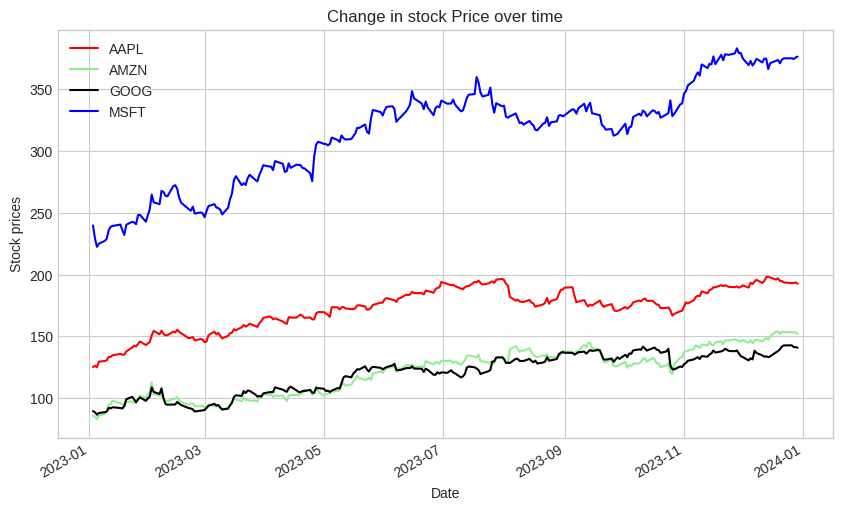

In [18]:
#ploting the change in stock price over time for different stocks
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['red', 'lightgreen', 'black', 'blue']
# styles = ['-', '--', '-.', ':']
idx = 0
for ticker, ticker_df in ticker_data.items():
    ticker_df['close'].plot(ax=ax, label=ticker, color=colors[idx])
    idx += 1
plt.style.use('seaborn-v0_8-whitegrid')
plt.legend()
plt.ylabel("Stock prices")
plt.xlabel("Date")
plt.title("Change in stock Price over time");

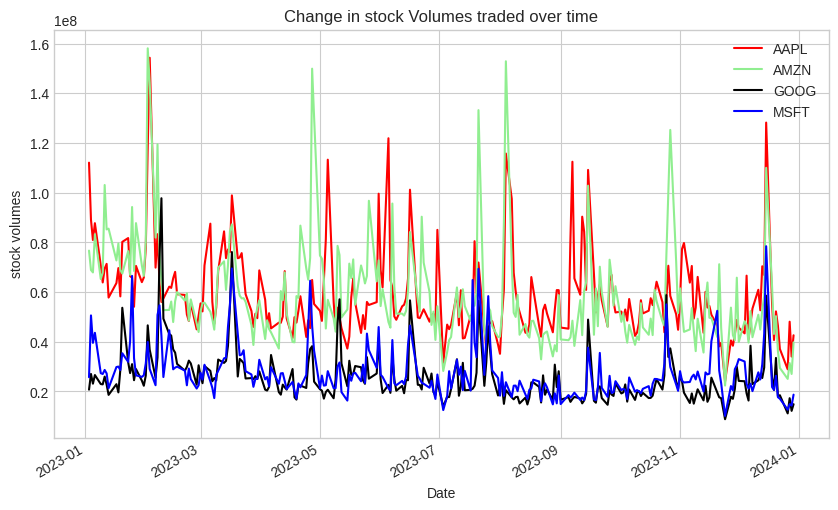

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['red', 'lightgreen', 'black', 'blue']
# styles = ['-', '--', '-.', ':']
idx = 0
for ticker, ticker_df in ticker_data.items():
    ticker_df['volume'].plot(ax=ax, label=ticker, color=colors[idx])
    idx += 1
plt.style.use('seaborn-v0_8-whitegrid')
plt.legend()
plt.ylabel("stock volumes")
plt.xlabel("Date")
plt.title("Change in stock Volumes traded over time");

#### This seems totally unreadable to me but I thought of a better way to visualize for real
However, close to end of the 2023, Apple sold the most volumes of stock, then Amazon, followed by microsoft and google comming last

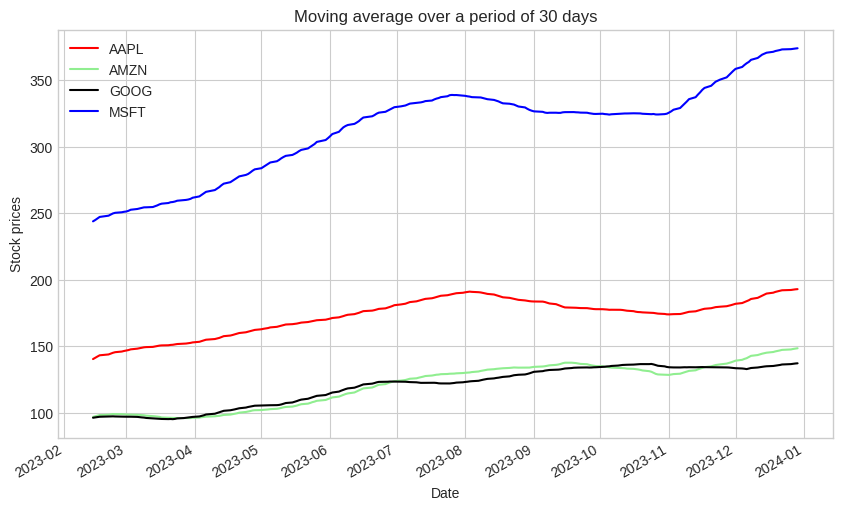

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['red', 'lightgreen', 'black', 'blue']
# styles = ['-', '--', '-.', ':']
idx = 0
for ticker, ticker_df in ticker_data.items():
    ticker_df['adjclose'].rolling(window=window_size).mean().plot(label=ticker, 
                                                                  ax=ax, color=colors[idx])
    idx += 1
plt.style.use('seaborn-v0_8-whitegrid')
plt.legend()
plt.ylabel("Stock prices")
plt.xlabel("Date")
plt.title("Moving average over a period of 30 days");

In [21]:
daily_returns = {}
for ticker, ticker_df in ticker_data.items():
    ticker_df['Daily Return'] = ticker_df['adjclose'].pct_change().fillna(0)
    daily_return_average = round(ticker_df['Daily Return'].mean() * 100, 2)
    daily_returns[ticker] = daily_return_average
    print(f'On an average the {ticker} stock is increases by {daily_return_average}% daily')

On an average the AAPL stock is increases by 0.18% daily
On an average the AMZN stock is increases by 0.25% daily
On an average the GOOG stock is increases by 0.2% daily
On an average the MSFT stock is increases by 0.2% daily


In [22]:
# ticker_data['GOOG'].head() #just to check for the mistake you made the other time otherwise you can delete the cell

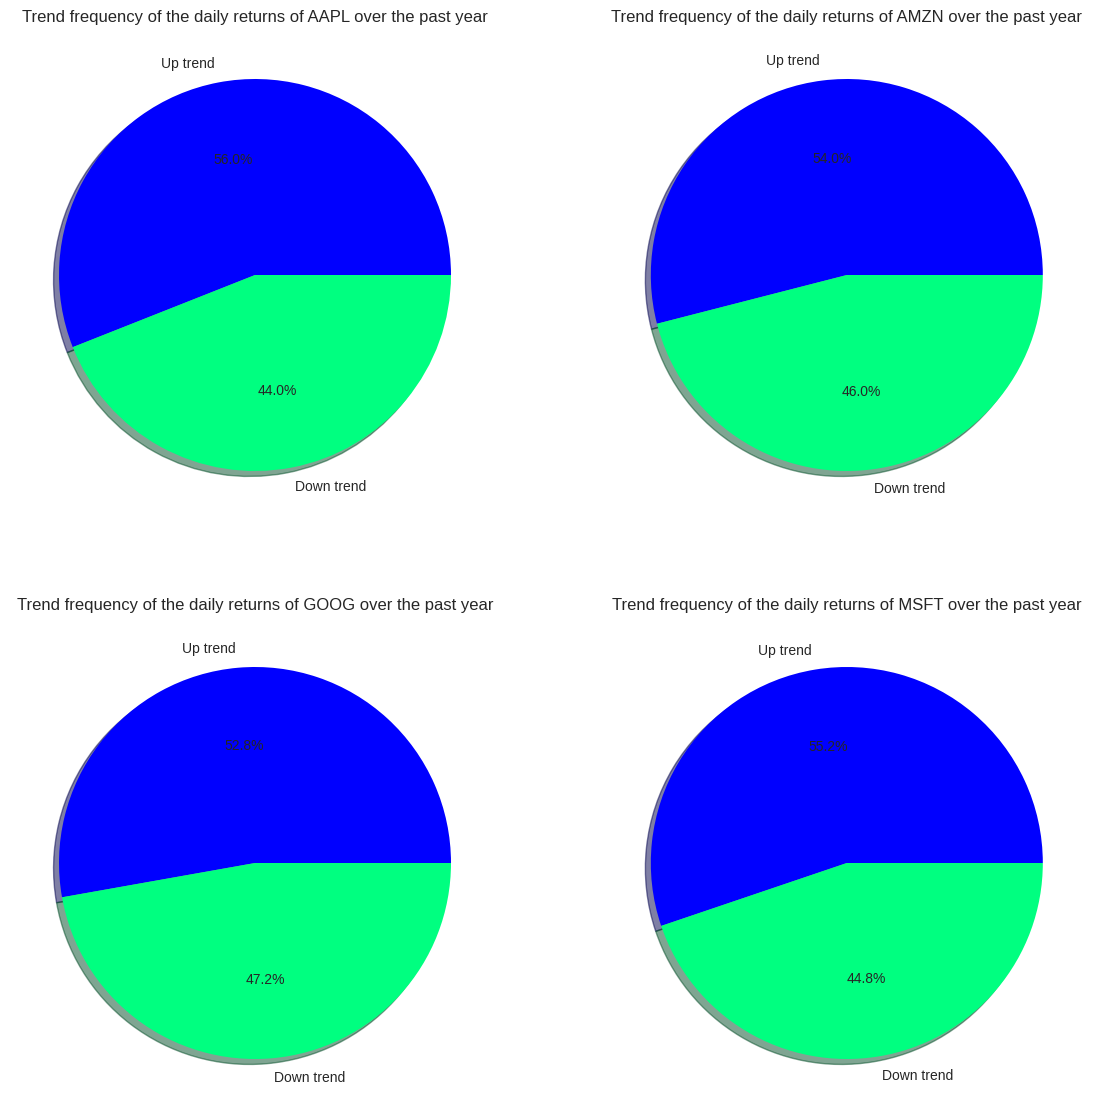

In [23]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14, 14))
ax_count = 0
axes = [ax1, ax2, ax3, ax4]
for ticker, ticker_df in ticker_data.items():
    ax = axes[ax_count]
    # print(ax)
    ax_count += 1
    # print(type(ticker))
    ticker_df['Trend'] = np.where(ticker_df['Daily Return'] > 0, 'Up', 'Down')
    trend_count =ticker_df['Trend'].value_counts()
    trend_count.plot(kind='pie', labels=["Up trend", "Down trend"], autopct='%1.1f%%',
                 shadow=True,
                 startangle=360,
                 cmap='winter',
                 ax=ax);
    ax.set_ylabel('')
    ax.set_title(f"Trend frequency of the daily returns of {ticker} over the past year");

In [24]:
corr_df = pd.DataFrame()
corr_df
for ticker, ticker_df in ticker_data.items():
    corr_df[ticker] = ticker_df['Daily Return']
corr_df.corr()

,AAPL,AMZN,GOOG,MSFT
AAPL,1.000000,0.441717,0.536189,0.548020
AMZN,0.441717,1.000000,0.612131,0.575954
GOOG,0.536189,0.612131,1.000000,0.518343
MSFT,0.548020,0.575954,0.518343,1.000000


In [25]:
# dataFrames = [data['Daily Return'] for data in ticker_data.values()]
# testing = pd.concat(dataFrames, keys=tickers, axis=1)
# len(dataFrames)
# testing.head()



#Figured this would work for getting the daily return to one dataframe too

<Axes: >

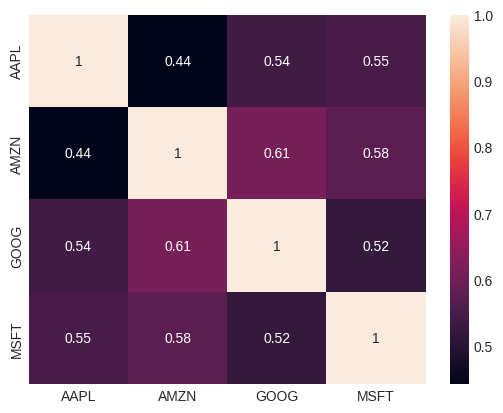

In [28]:
corr_df.corr()
sns.heatmap(data=corr_df.corr(), annot=True) #had to upgrade to sns 0.13.0 to annotate the values

From the correlation map, the most correlated daily returns happens with Amazon (AMZN) and Google(GOOG)
And mostly the stock daily returns are fairly correlated with Amazon (AMZN) and Apple (AAPL)  being the least correlated

Never done financial analysis before, but I think the amazon stock is what I should invest in, it's not too expensive has a decent daily return average over the years and it sold a quite an impressive number of volumes and it seems to be growing.